In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import collections

读取灰度图

In [3]:
image = cv2.imread("image.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


计算灰度图直方图

In [4]:
def draw_hist(grayimg):
    gray_key = []
    gray_count = []
    gray_result = []
    histogram_gray = list(grayimg.ravel())  # 将多维数组转换成一维数组
    gray = dict(collections.Counter(histogram_gray))  # 统计图像中每个灰度级出现的次数
    gray = sorted(gray.items(), key=lambda item: item[0])  # 根据灰度级大小排序
    for element in gray:
        key = list(element)[0]
        count = list(element)[1]
        gray_key.append(key)
        gray_count.append(count)
    for i in range(0, 256):
        if i in gray_key:
            num = gray_key.index(i)
            gray_result.append(gray_count[num])
        else:
            gray_result.append(0)
    gray_result = np.array(gray_result)
    return gray_result

直方图均衡化

In [5]:
def histogram_equalization(hist, image):
    zero = np.zeros(256, dtype=image.dtype)  # 创建空的查找表,返回image类型的用0填充的数组；
    sum_temp = 0
    cf = []
    for i in hist:
        sum_temp += i
        cf.append(sum_temp)
    for i, v in enumerate(zero):
        zero[i] = int(255.0 * (cf[i] / sum_temp) + 0.5)
    equalization_result = zero[image]
    return equalization_result


In [6]:
x = []
for i in range(0, 256):  # 横坐标
    x.append(i)
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

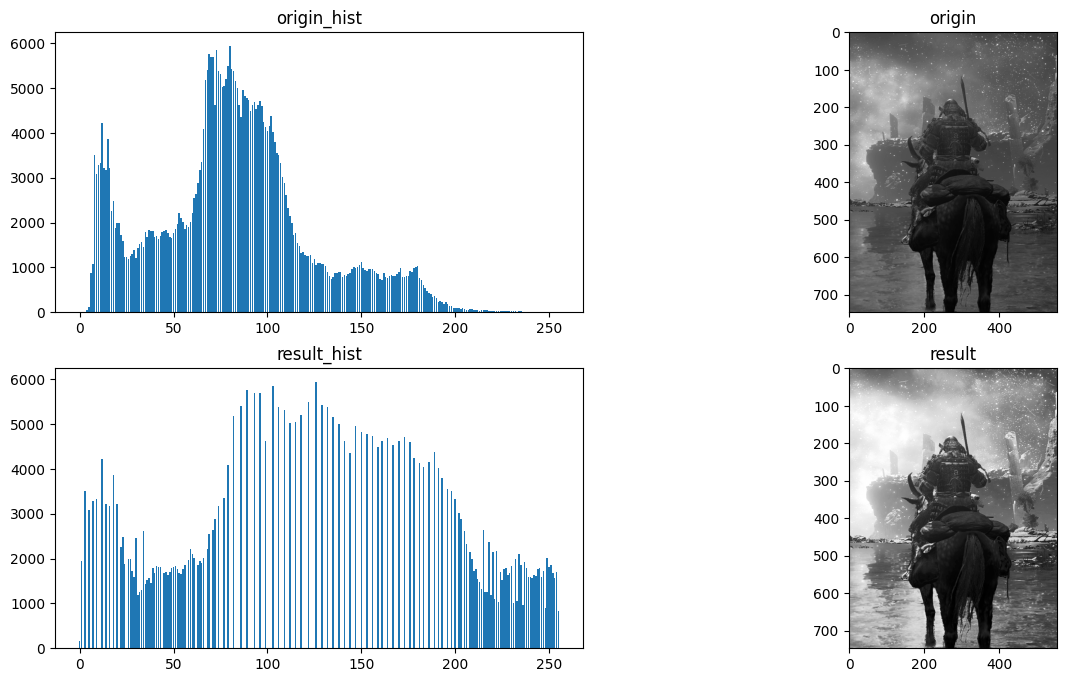

In [55]:
hist = draw_hist(image_gray)  # 直方图转化

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.title('origin_hist')
plt.bar(x, hist)  # 绘制原图直方图

plt.subplot(2, 2, 2)
plt.title('origin')
plt.imshow(image_gray,cmap='gray')

result = histogram_equalization(hist, image_gray)  # 均衡化处理得到了result图
hist_result = draw_hist(result) # 均衡化后的图的直方图计算

plt.subplot(2, 2, 3)
plt.title("result_hist")
plt.bar(x, hist_result)

plt.subplot(2, 2, 4)
plt.title("result")
plt.imshow(result,cmap='gray')

plt.show()

In [8]:
hist = draw_hist(image)  # 直方图转化

plt.figure(figsize=(15, 8))
cv2.imshow("origin",image)

result = histogram_equalization(hist, image)  # 均衡化处理得到了result图
hist_result = draw_hist(result) # 均衡化后的图的直方图计算
cv2.imshow("result", result)

cv2.waitKey(0)
cv2.destroyAllWindows()

<Figure size 1500x800 with 0 Axes>